# Data Analysis


## Data Analysis - key drivers for attrition 
- Summary Statistic 
- Plot on Employee Attrition Rate
- Pie chart on employee who left the company in 3 months, 6 months and 9 months
- Employee attrition by Age
- Employee attrition by Working time
- Employee attrition by Salary
- Employee Attrition by Gender
- Employee Attrition by Marital Status
- Employee Attrition by Contract Type
- Employee Attrition by Payment Period Tpye

In [1]:
# Import libraries
import time
import math
from datetime import datetime as dt
import random
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from pandas.plotting import parallel_coordinates
%matplotlib inline

## Load The Dataset and Select Useful Features

In [3]:
# Load the Dataset
Employee_df = pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
Employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# Check all the features
Employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Dataset Dimension 
Employee_df.shape

(1470, 35)

# Data Analysis

## Create a summary plot

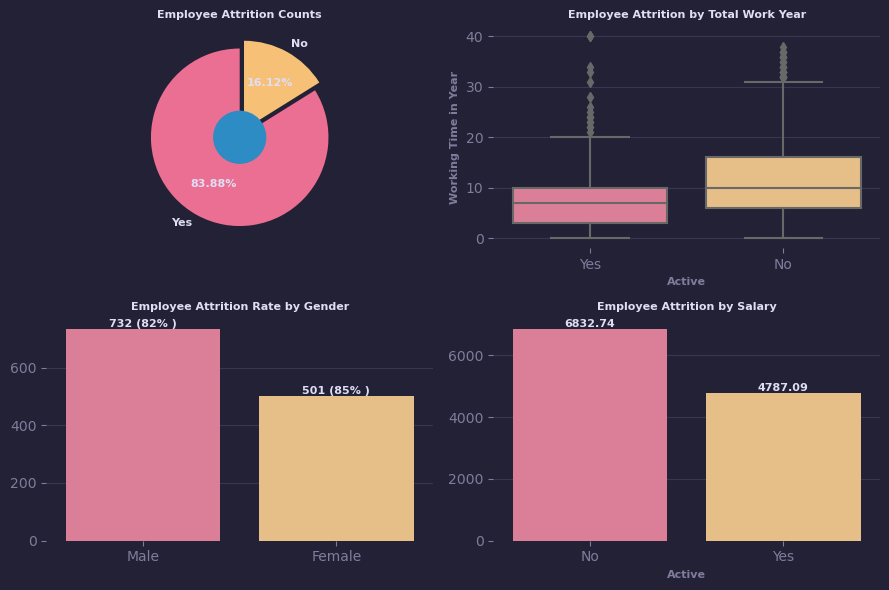

In [10]:
plt.style.use("rose-pine-moon")

plt.figure(figsize=(9,6))
plt.subplot(2,2,1)

# Bar plot

attrition_rate = Employee_df["Attrition"].value_counts()

plt.pie(attrition_rate, labels=["Yes","No"], autopct="%.2f%%", textprops={"fontweight":"black","size":8},
        explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='#2c8cc3')
plt.title("Employee Attrition Counts",fontweight="black",size=8)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# box plot
plt.subplot(2,2,2)
ax = sns.boxplot(x="Attrition",y="TotalWorkingYears",data=Employee_df)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition by Total Work Year",fontweight="black",size=8)
ax.set_xlabel( "Active",fontweight="black",size=8)
ax.set_ylabel( "Working Time in Year",fontweight="black",size=8)

# bar plot - sex 
plt.subplot(2,2,3)
new_df = Employee_df[Employee_df["Attrition"]=='No']
df1 = Employee_df["Gender"].value_counts()
df2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((df2/df1)*100).values
sns.barplot(x=df2.index, y=df2.values)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=8)

for index,value in enumerate(df2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=8,fontweight="black")

# bar plot - salary
plt.subplot(2,2,4)
df = Employee_df.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()
ax = sns.barplot(x=df.Attrition,y=df.MonthlyIncome)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition by Salary",fontweight="black",size=8)
ax.bar_label(ax.containers[0], size=8,fontweight="black") 
ax.set_xlabel( "Active",fontweight="black",size=8)
ax.set(ylabel=None)
plt.tight_layout()
plt.show()


## Plot on Employee Attrition Rate

## Employee attrition by Age 

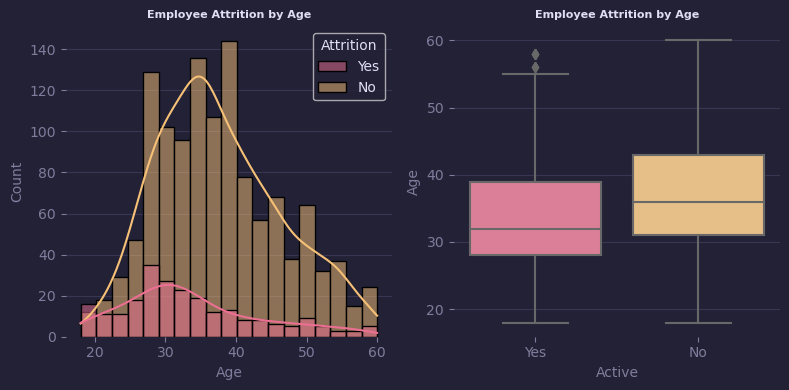

In [18]:
#Visualization to show Employee Distribution by Age.
plt.style.use("rose-pine-moon")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

sns.histplot(x="Age", hue="Attrition", kde=True ,data=Employee_df)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition by Age",fontweight="black",size=8)

#Visualization to show Employee Attrition by Monthly Age.
plt.subplot(1,2,2)
ax = sns.boxplot(x="Attrition",y="Age",data=Employee_df)
sns.despine(bottom = True, left = True)
ax.set_xlabel( "Active")
plt.title("Employee Attrition by Age",fontweight="black",size=8)
plt.tight_layout()
plt.show()

## Employee Attrition by Work time in Year
### Key finding
- Active employee has longer working years comparing to inactive employees

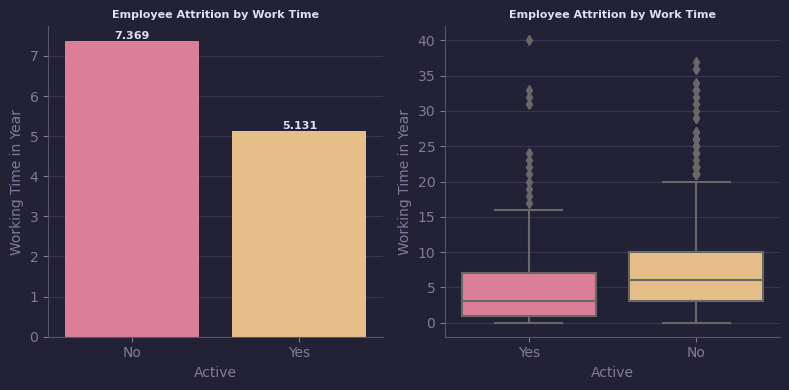

In [19]:
# Bar Plot to show Employee Distribution by Work Time.
plt.style.use("rose-pine-moon")

df = Employee_df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.barplot(x=df.Attrition,y=round(df.YearsAtCompany,3))
plt.title("Employee Attrition by Work Time",fontweight="black",size=8)
ax.bar_label(ax.containers[0], size=8,fontweight="black")
ax.set_xlabel( "Active")
ax.set_ylabel( "Working Time in Year")

# Box Plot to show Employee Attrition by Monthly Work Time.
plt.subplot(1,2,2)
ax = sns.boxplot(x="Attrition",y="YearsAtCompany",data=Employee_df)
ax.set_xlabel( "Active")
ax.set_ylabel( "Working Time in Year")
plt.title("Employee Attrition by Work Time",fontweight="black",size=8)
plt.tight_layout()
plt.show()

## Employee Attrition by Salary

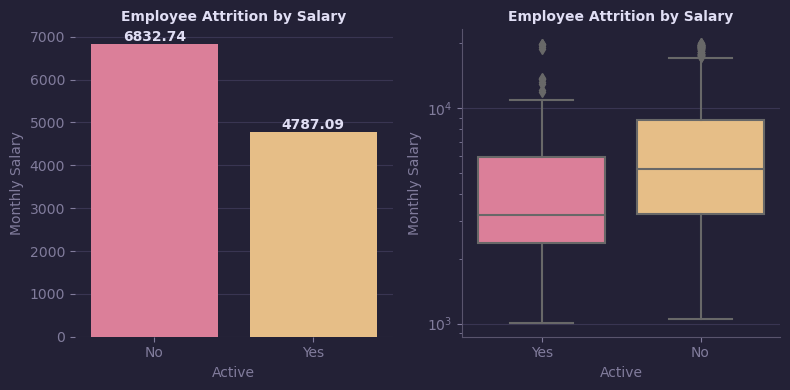

In [20]:
# Bar Plot to show Employee Distribution by Salary.
df = Employee_df.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()

plt.style.use("rose-pine-moon")
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

ax = sns.barplot(x=df.Attrition,y=df.MonthlyIncome)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition by Salary",fontweight="black",size=10)
ax.bar_label(ax.containers[0], size=10,fontweight="black")  
ax.set_xlabel( "Active")
ax.set_ylabel( "Monthly Salary")

# Box Plot to show Employee Attrition by Monthly Age.
plt.subplot(1,2,2)
ax = sns.boxplot(x="Attrition",y="MonthlyIncome",data=Employee_df)
ax.set_yscale("log")
ax.set_xlabel( "Active")
ax.set_ylabel( "Monthly Salary")
plt.title("Employee Attrition by Salary",fontweight="black",size=10)
plt.tight_layout()
plt.show()

## Employee Attrition by Gender
### Key finding
- There are more male comparing to female in the company. Among the employee who have left, male has a sligher higher turn over rate comparing to female ( 68% vs. 67%)

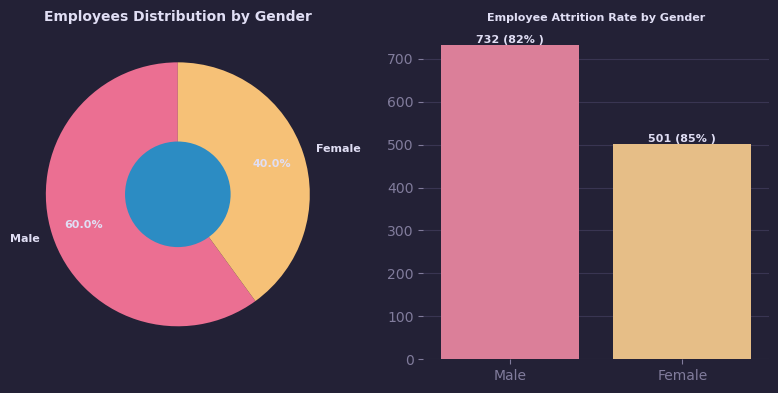

In [21]:
#Visualization to show Total Employees by Gender.
plt.style.use("rose-pine-moon")
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

df = Employee_df["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=10)
plt.pie(df,labels=df.index,autopct="%.1f%%",pctdistance=0.75,startangle=90, textprops={"fontweight":"black","size":8})
center_circle = plt.Circle((0, 0), 0.4,fc='#2c8cc3')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = Employee_df[Employee_df["Attrition"]=='No']
df1 = Employee_df["Gender"].value_counts()
df2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((df2/df1)*100).values
sns.barplot(x=df2.index, y=df2.values)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=8)
for index,value in enumerate(df2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=8,fontweight="black")
plt.tight_layout()
plt.show()
    

## Employee Attrition by Marital Status

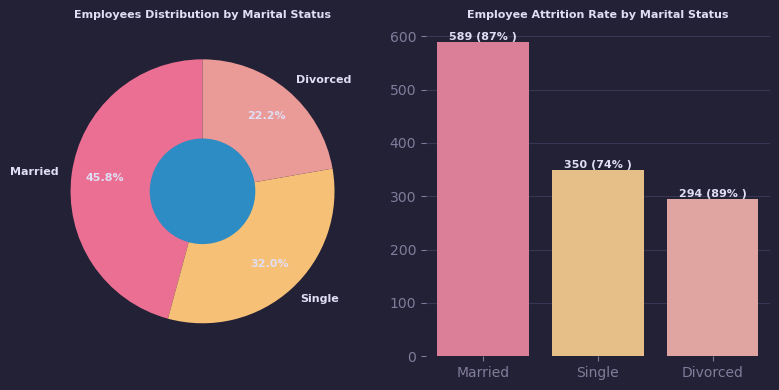

In [23]:
#Visualization to show Total Employees by Marital Status.
plt.style.use("rose-pine-moon")
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

df = Employee_df["MaritalStatus"].value_counts()
plt.title("Employees Distribution by Marital Status",fontweight="black",size=8)
plt.pie(df,labels=df.index,autopct="%.1f%%",pctdistance=0.75,startangle=90,
        textprops={"fontweight":"black","size":8})
center_circle = plt.Circle((0, 0), 0.4,fc='#2c8cc3')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Employee Attrition by Marital Status.
plt.subplot(1,2,2)
new_df = Employee_df[Employee_df["Attrition"]=='No']
df1 = Employee_df["MaritalStatus"].value_counts()
df2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((df2/df1)*100).values
sns.barplot(x=df2.index, y=df2.values)
sns.despine(bottom = True, left = True)
plt.title("Employee Attrition Rate by Marital Status",fontweight="black",size=8)
for index,value in enumerate(df2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=8,fontweight="black")
plt.tight_layout()
plt.show()
    